<a href="https://colab.research.google.com/github/codedmachine111/ML/blob/master/Deep%20Learning/MNIST_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [ ]:
!pip install opendatasets -q
import opendatasets as od
od.download('https://www.kaggle.com/competitions/digit-recognizer/data')

Skipping, found downloaded files in "./digit-recognizer" (use force=True to force download)


In [ ]:
df = pd.read_csv('/content/digit-recognizer/train.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.shape

(42000, 785)

In [ ]:
df['label'].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

<Axes: xlabel='label', ylabel='count'>

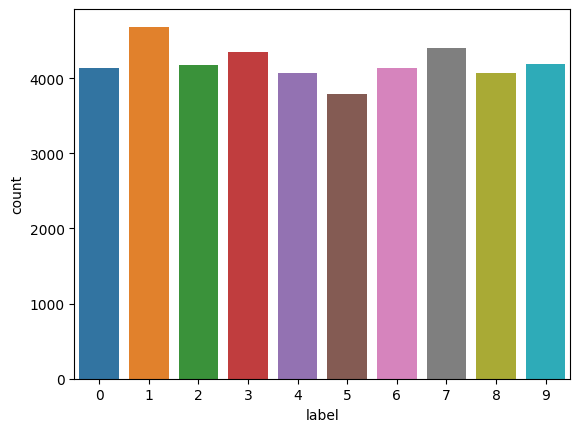

In [ ]:
import seaborn as sns
sns.countplot(x='label', data=df)

# Working with numpy

In [ ]:
data = np.array(df)
data[:10], data.shape

(array([[1, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        ...,
        [3, 0, 0, ..., 0, 0, 0],
        [5, 0, 0, ..., 0, 0, 0],
        [3, 0, 0, ..., 0, 0, 0]]),
 (42000, 785))

In [ ]:
# shuffling our data
m, n = data.shape
np.random.shuffle(data)

In [ ]:
# Get the first 1000 samples for validation
data_dev = data[0:1000].T

X_dev = data_dev[1:n]
y_dev = data_dev[0]

In [ ]:
# Get the remaining samples for training
data_train = data[1000:m].T

X_train = data_train[1:n]
y_train = data_train[0]

In [ ]:
X_train[:,1].shape

(784,)

In [ ]:
def init_params():
  W1 = np.random.randn(10,784) - 0.5  # creates an array of shape (10,784) with random values (between -1 and 1 in this case)
  b1 = np.random.randn(10,1) - 0.5
  W2 = np.random.randn(10,10) - 0.5  # creates an array of shape (10,784) with random values (between -1 and 1 in this case)
  b2 = np.random.randn(10,1) - 0.5
  return W1, b1, W2, b2

In [ ]:
def ReLU(X):
  return np.maximum(0,X)

In [ ]:
def softmax(X):
  return np.exp(X) / np.sum(np.exp(X))

In [ ]:
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

In [ ]:
def one_hot(Y):
  one_hot_Y = np.zeros((Y.size, Y.max()+1))  # Y.max() would be 9
  one_hot_Y[np.arange(Y.size), Y] =1
  return one_hot_Y.T

In [ ]:
def deriv_ReLU(x):
  return x>0

In [ ]:
def backward_prop(Z1, A1, Z2, A2, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)

    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

In [ ]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
  W1 = W1 - alpha * dW1
  b1 = b1 - alpha * db1
  W2 = W2 - alpha * dW2
  b2 = b2 - alpha * db2
  return W1, b1, W2, b2

In [ ]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

In [ ]:
def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [ ]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.

def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2


In [ ]:
%time
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.1, 500)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs
Iteration:  0
[0 0 8 ... 0 0 8] [7 0 0 ... 2 6 7]
0.10117073170731708
Iteration:  10
[3 0 4 ... 0 2 8] [7 0 0 ... 2 6 7]
0.19617073170731708
Iteration:  20
[3 0 4 ... 7 2 7] [7 0 0 ... 2 6 7]
0.3012439024390244
Iteration:  30
[7 0 8 ... 7 2 7] [7 0 0 ... 2 6 7]
0.38695121951219513
Iteration:  40
[7 0 8 ... 7 2 7] [7 0 0 ... 2 6 7]
0.4475609756097561
Iteration:  50
[7 0 8 ... 7 6 7] [7 0 0 ... 2 6 7]
0.4929268292682927
Iteration:  60
[7 0 0 ... 7 6 7] [7 0 0 ... 2 6 7]
0.5294878048780488
Iteration:  70
[7 0 0 ... 7 2 7] [7 0 0 ... 2 6 7]
0.5619512195121952
Iteration:  80
[7 0 0 ... 7 2 7] [7 0 0 ... 2 6 7]
0.5936341463414634
Iteration:  90
[7 0 0 ... 7 2 7] [7 0 0 ... 2 6 7]
0.6204390243902439
Iteration:  100
[7 0 0 ... 7 2 7] [7 0 0 ... 2 6 7]
0.645
Iteration:  110
[7 0 0 ... 7 2 7] [7 0 0 ... 2 6 7]
0.6647560975609756
Iteration:  120
[7 0 0 ... 7 2 7] [7 0 0 ... 2 6 7]
0.6815853658536586
Iteration:  130
[7 0 0 ... 7 2 7] 